#**Step 1: Loading the MNIST dataset**

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Define data transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 92113922.97it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 48727149.57it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 29260981.06it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1488671.47it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



#**Step 2: Visualize the MNIST dataset**

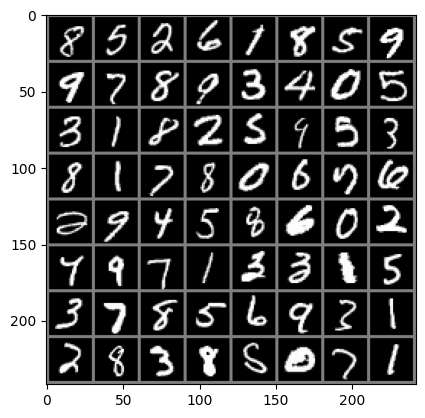

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))


#**Step 3: Design your Neural Network model**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()


#**Step 4: Setup hyperparameters**

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)


#**Step 5: Develop a training loop and run the training**

In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")


Epoch 1, Loss: 0.38090590437623995
Epoch 2, Loss: 0.1892046492252904
Epoch 3, Loss: 0.136464704123975
Epoch 4, Loss: 0.11201249009895839
Epoch 5, Loss: 0.09275941163011546
Epoch 6, Loss: 0.08212809046325303
Epoch 7, Loss: 0.07170774952979135
Epoch 8, Loss: 0.06255950237900368
Epoch 9, Loss: 0.05810232748459183
Epoch 10, Loss: 0.052366780991137805


#**Step 6: Evaluate the model**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

correct = 0
total = 0
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        predicted_labels.extend(predicted.numpy())
        true_labels.extend(labels.numpy())

accuracy = 100 * correct / total
print(f"Accuracy: {accuracy}%")

confusion_mat = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_mat)

f1 = f1_score(true_labels, predicted_labels, average='weighted')
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Accuracy: 97.56%
Confusion Matrix:
[[ 969    0    1    1    0    4    1    1    2    1]
 [   0 1122    3    1    0    1    4    1    3    0]
 [   6    0 1005    4    3    1    1    2   10    0]
 [   0    0    7  993    0    4    0    1    2    3]
 [   3    0    2    2  953    1    5    1    2   13]
 [   4    0    0    5    0  878    2    1    1    1]
 [   6    3    0    1    4    8  932    0    4    0]
 [   2    9   14    8    0    0    0  982    4    9]
 [   3    0    3    3    3   10    3    2  944    3]
 [   1    3    0    6    7    6    2    3    3  978]]
F1 Score: 0.9755910836055979
Precision: 0.9756924002846883
Recall: 0.9756


In [ ]:
from sklearn.metrics import classification_report

# Menghitung prediksi dan label sebenarnya
correct = 0
total = 0
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        predicted_labels.extend(predicted.numpy())
        true_labels.extend(labels.numpy())

# Membuat laporan klasifikasi
classification_rep = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.96      0.98      0.97       892
           6       0.98      0.97      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#**Describe and explain your Result**

Berdasarkan data yang telah diberikan, kesimpulan dari kinerja model klasifikasi digit tulisan tangan MNIST yaitu:

1. **Akurasi Model**: Model memiliki akurasi sekitar 97.56%. Ini adalah hasil yang sangat baik, yang berarti model mampu mengklasifikasikan sebagian besar digit tulisan tangan dengan benar.

2. **Matriks Konfusi**: Matriks konfusi menunjukkan bahwa model memiliki kinerja yang baik dalam mengklasifikasikan digit. Sebagian besar digit diklasifikasikan dengan benar, dengan angka kesalahan yang rendah.

3. **Skor F1, Presisi, dan Recall**: Skor F1, presisi, dan recall untuk setiap kelas adalah tinggi. Hal ini menunjukkan bahwa model memiliki kinerja yang baik dalam mengenali setiap digit dengan benar.

4. **Laporan Klasifikasi**: Laporan klasifikasi mengkonfirmasi bahwa model memiliki kinerja yang kuat untuk setiap kelas, dengan skor F1 yang tinggi.

**Kesimpulan Akhir**: Model diatas telah melatih dengan baik dan memiliki kinerja yang sangat baik dalam mengklasifikasikan digit tulisan tangan MNIST. Akurasi yang tinggi, matriks konfusi yang baik, skor F1 yang tinggi, presisi, dan recall semua menunjukkan bahwa model ini siap digunakan untuk tugas klasifikasi digit.